In [4]:
# dane gieldowe historyczne pobieram ze strony: https://stooq.pl/db/h/
# ./notowania/wse stocks/gpw.txt
import pandas as pd
import numpy as np
import re
from datetime import datetime
import os

In [5]:
#path = './notowania/wse stocks'
path = './GPW_stocks/GPW_stocks'
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.txt' in file:
            files.append(os.path.join(r, file))
files.sort()
akcje_all = pd.DataFrame(columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt', 'Name'])

for f in files:
    try:
        akcje = pd.read_csv(f)
    except:
        print(f)

    akcje_2019 = akcje[akcje["Date"]>=20190000]
    akcje_2019["Name"]=f[len(path)+1:-4]
    akcje_all = akcje_all.append(akcje_2019,ignore_index=True)
#akcje.info()
#akcje_2019.shape
#akcje_all.shape

akcje_all[akcje_all["Name"]=='gpw']

/home/szulce/virtualenvs/stock_comms_analyzer_venv/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,Open,High,Low,Close,Volume,OpenInt,Name
28545,20190102,33.799,34.262,33.707,34.216,10935,0,gpw
28546,20190103,34.077,34.725,34.077,34.124,33509,0,gpw
28547,20190104,34.031,34.679,34.031,34.401,8228,0,gpw
28548,20190107,34.401,35.096,34.401,34.725,20204,0,gpw
28549,20190108,34.725,35.327,34.725,35.281,33843,0,gpw
...,...,...,...,...,...,...,...,...
28767,20191120,38.800,38.800,38.000,38.000,29910,0,gpw
28768,20191121,38.100,38.500,38.050,38.150,30362,0,gpw
28769,20191122,38.350,38.500,38.150,38.450,11781,0,gpw
28770,20191125,38.300,39.000,38.300,39.000,57614,0,gpw


In [6]:
#temp = akcje_all[akcje_all["Name"]=='gpw']
temp=akcje_all

In [7]:
# temp[((temp.High - temp.Low)/temp.Low)>0.05]

In [8]:
temp

,Date,Open,High,Low,Close,Volume,OpenInt,Name
0,20190102,0.80,0.81,0.80,0.81,59,0,08n
1,20190103,0.81,0.81,0.81,0.81,38,0,08n
2,20190104,0.81,0.86,0.81,0.82,889,0,08n
3,20190107,0.82,0.87,0.82,0.85,8650,0,08n
4,20190108,0.86,0.93,0.86,0.86,2488,0,08n
...,...,...,...,...,...,...,...,...
85233,20191120,510.00,515.00,500.00,500.00,112,0,zwc
85234,20191121,500.00,505.00,500.00,505.00,37,0,zwc
85235,20191122,505.00,505.00,500.00,505.00,290,0,zwc
85236,20191125,510.00,510.00,505.00,505.00,17,0,zwc


In [9]:
temp = temp.set_index([temp.Name, temp.Date])

In [10]:
temp.drop(['Name','Date','OpenInt','Open','Low','Close','Volume'], axis=1, inplace=True)

In [11]:
temp

High
Name Date            
08n  20190102    0.81
     20190103    0.81
     20190104    0.86
     20190107    0.87
     20190108    0.93
...               ...
zwc  20191120  515.00
     20191121  505.00
     20191122  505.00
     20191125  510.00
     20191126  505.00

[85238 rows x 1 columns]

In [24]:
data = pd.concat(
            [temp,
             -temp.groupby('Name')['High'].diff(periods=-1).rename("High+1"),
             -temp.groupby('Name')['High'].diff(periods=-2),
             -temp.groupby('Name')['High'].diff(periods=-3),
             -temp.groupby('Name')['High'].diff(periods=-4),
             -temp.groupby('Name')['High'].diff(periods=-5)],
           axis=1)
data

High  High+1   High  High   High  High
Name Date                                              
08n  20190102    0.81   -0.00   0.05  0.06   0.12  0.07
     20190103    0.81    0.05   0.06  0.12   0.07  0.07
     20190104    0.86    0.01   0.07  0.02   0.02  0.02
     20190107    0.87    0.06   0.01  0.01   0.01  0.01
     20190108    0.93   -0.05  -0.05 -0.05  -0.05 -0.04
...               ...     ...    ...   ...    ...   ...
zwc  20191120  515.00  -10.00 -10.00 -5.00 -10.00   NaN
     20191121  505.00   -0.00   5.00 -0.00    NaN   NaN
     20191122  505.00    5.00  -0.00   NaN    NaN   NaN
     20191125  510.00   -5.00    NaN   NaN    NaN   NaN
     20191126  505.00     NaN    NaN   NaN    NaN   NaN

[85238 rows x 6 columns]

In [26]:
data = pd.concat(
            [temp,
             -temp.groupby('Name')['High'].diff(periods=-1).rename('High+1'),
             -temp.groupby('Name')['High'].diff(periods=-2).rename('High+2'),
             -temp.groupby('Name')['High'].diff(periods=-3).rename('High+3'),
             -temp.groupby('Name')['High'].diff(periods=-4).rename('High+4'),
             -temp.groupby('Name')['High'].diff(periods=-5).rename('High+5')],
           axis=1)
data.columns=['High','High+1','High+2','High+3','High+4','High+5']
data['High+1_pct']=data['High+1']/data['High']
data['High+2_pct']=data['High+2']/data['High']
data['High+3_pct']=data['High+3']/data['High']
data['High+4_pct']=data['High+4']/data['High']
data['High+5_pct']=data['High+5']/data['High']

In [13]:
data

NameError: name 'data' is not defined

In [10]:
data[data['High+5_pct']>0.5]

High  High+1  High+2  High+3  High+4  High+5  High+1_pct  \
Name Date                                                                   
act  20190307  2.7100 -0.0100 -0.0100 -0.0100  1.1900  1.5300   -0.003690   
agt  20191024  2.5960  0.0320  0.1020  0.5190  1.1040  1.4940    0.012327   
     20191025  2.6280  0.0700  0.4870  1.0720  1.4620  1.5120    0.026636   
     20191028  2.6980  0.4170  1.0020  1.3920  1.4420  1.4220    0.154559   
ali  20190204  2.3200  0.0400 -0.0500  0.3500  0.7900  1.2800    0.017241   
...               ...     ...     ...     ...     ...     ...         ...   
wis  20190524  0.0160  0.0045  0.0140  0.0350  0.0360  0.0370    0.281250   
     20190527  0.0205  0.0095  0.0305  0.0315  0.0325  0.0325    0.463415   
     20190722  0.0300  0.0210  0.0220  0.0230  0.0230  0.0230    0.700000   
     20191107  0.0400  0.0110  0.0120  0.0120  0.0120  0.0220    0.275000   
wse  20190103  1.6700  0.0100  0.1700  0.2800  0.5200  1.0600    0.005988   

               High+2_pct  High+3_pct  High+4_pct  High+5_pct  
Name Date                                                      
act  20190307   -0.003690   -0.003690    0.439114    0.564576  
agt  20191024    0.039291    0.199923    0.425270    0.575501  
     20191025    0.185312    0.407915    0.556317    0.575342  
     20191028    0.371386    0.515938    0.534470    0.527057  
ali  20190204   -0.021552    0.150862    0.340517    0.551724  
...                   ...         ...         ...         ...  
wis  20190524    0.875000    2.187500    2.250000    2.312500  
     20190527    1.487805    1.536585    1.585366    1.585366  
     20190722    0.733333    0.766667    0.766667    0.766667  
     20191107    0.300000    0.300000    0.300000    0.550000  
wse  20190103    0.101796    0.167665    0.311377    0.634731  

[203 rows x 11 columns]

In [11]:
d = data.reset_index()
d

,Name,Date,High,High+1,High+2,High+3,High+4,High+5,High+1_pct,High+2_pct,High+3_pct,High+4_pct,High+5_pct
0,08n,20190102,0.81,-0.00,0.05,0.06,0.12,0.07,-0.000000,0.061728,0.074074,0.148148,0.086420
1,08n,20190103,0.81,0.05,0.06,0.12,0.07,0.07,0.061728,0.074074,0.148148,0.086420,0.086420
2,08n,20190104,0.86,0.01,0.07,0.02,0.02,0.02,0.011628,0.081395,0.023256,0.023256,0.023256
3,08n,20190107,0.87,0.06,0.01,0.01,0.01,0.01,0.068966,0.011494,0.011494,0.011494,0.011494
4,08n,20190108,0.93,-0.05,-0.05,-0.05,-0.05,-0.04,-0.053763,-0.053763,-0.053763,-0.053763,-0.043011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85233,zwc,20191120,515.00,-10.00,-10.00,-5.00,-10.00,NaN,-0.019417,-0.019417,-0.009709,-0.019417,NaN
85234,zwc,20191121,505.00,-0.00,5.00,-0.00,NaN,NaN,-0.000000,0.009901,-0.000000,NaN,NaN
85235,zwc,20191122,505.00,5.00,-0.00,NaN,NaN,NaN,0.009901,-0.000000,NaN,NaN,NaN
85236,zwc,20191125,510.00,-5.00,NaN,NaN,NaN,NaN,-0.009804,NaN,NaN,NaN,NaN


In [162]:
# wzrost wartości akcji przynajmniej w jednym z kolejnych 5 dni:
# jak > 0: 59%
# jak > 5%: 19% (to jest moje y)
k = 0
k = 0.05
d[(d['High+5_pct']>k) | (d['High+4_pct']>k) | (d['High+3_pct']>k) | (d['High+2_pct']>k) | (d['High+1_pct']>k)].shape[0]/d.shape[0]

0.19234379032825735

In [159]:
z=list(np.arange(-1,1,0.05))
z.append(1)
z
os_x=[]
zbiory=[]
for el in range(len(z)-1):
# k = 0.15
    k=z[el]
    k1=z[el+1]
    a = d[(
        ((d['High+5_pct']>=k) & (d['High+5_pct']<k1))
          | ((d['High+4_pct']>=k) & (d['High+4_pct']<k1))
          | ((d['High+3_pct']>=k) & (d['High+3_pct']<k1))
          | ((d['High+2_pct']>=k) & (d['High+2_pct']<k1))
          | ((d['High+1_pct']>=k) & (d['High+1_pct']<k1))
        )
    ].shape[0]/(d.shape[0])
#     print(f'({k},{k1}>:', a)
    os_x.append(f'({round(k,2)},{round(k1,2)}>')
    zbiory.append(round(a,4))
zbiory
print(sum(zbiory))

1.8628999999999998


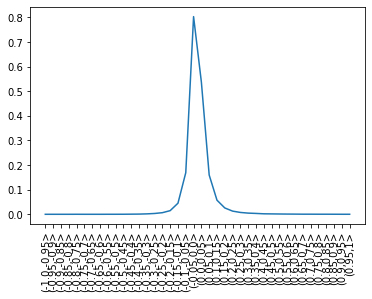

In [160]:
from matplotlib import pyplot as plt
plt.xticks(rotation=90)
plt.plot(os_x,zbiory)
plt.show()

In [195]:
X = d[["Date","Name"]]
X

,Date,Name
0,20190102,08n
1,20190103,08n
2,20190104,08n
3,20190107,08n
4,20190108,08n
...,...,...
85233,20191120,zwc
85234,20191121,zwc
85235,20191122,zwc
85236,20191125,zwc


In [192]:
np.sum(X.groupby(by=['Name','Date']).size()>1) # nie ma grup > 1 wartość, czyli ok

0

In [193]:
k = 0.05
y = (d['High+5_pct']>k) | (d['High+4_pct']>k) | (d['High+3_pct']>k) | (d['High+2_pct']>k) | (d['High+1_pct']>k)
y

0         True
1         True
2         True
3         True
4        False
         ...  
85233    False
85234    False
85235    False
85236    False
85237    False
Length: 85238, dtype: bool

In [194]:
y.mean()

0.19234379032825735

In [201]:
X[X['Name']=='fte']

,Date,Name
27274,20190102,fte
27275,20190103,fte
27276,20190104,fte
27277,20190107,fte
27278,20190108,fte
...,...,...
27496,20191120,fte
27497,20191121,fte
27498,20191122,fte
27499,20191125,fte
